In [ ]:
%matplotlib inline

# Assignment 1

**DUE: Monday, January 23rd 2023 at 5:00pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).
#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWERS HERE", as well as your name below:



In [ ]:
NAME = "Shayan Salsabilian"
STUDENT_ID = "1585653"

## Problem 1

![figure](https://docs.google.com/drawings/d/e/2PACX-1vR3cNeZWfHNbPXRGyZrKazhI2WNM9wroJoAsshbD7LzwEBd4k0W_zu-T30_O_4iHC2qpKRxCRBA1IjV/pub?w=480&h=320)

Which solution would the following search algorithms find to move from node *Start* to node *Goal* if run the algorithm on the search graph above? Break any ties alphabetically.

a. Breadth-First Search

b. Depth-First Search

c. Uniform Cost Search

Explain by drawing an equivalent search tree for each of them. Draw the search trees graphically. A good way to do this is through [Google Drawings](https://docs.google.com/drawings)

[YOUR ANSWERS HERE]

a. Goal reached indicated in red using BFS. The nodes visited will be Start-a-d-b-goal until the goal is reached (in that order). The final path returned will be Start -> D -> Goal

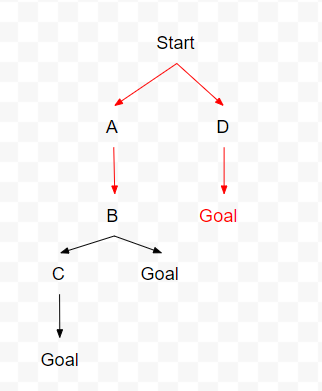

b.Goal reached indicated in red using DFS. The nodes visited will be Start-a-b-c-goal until the goal is reached (in that order). The final path returned will be Start -> A -> B -> C -> Goal.

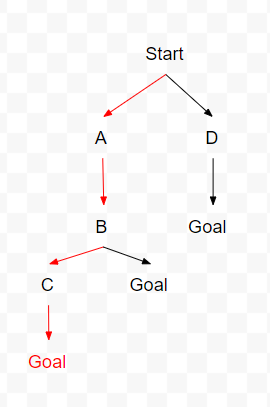

c.Goal reached indicated in red using UFS. The nodes visited will be Start-a-b-c-d-goal until the goal is reached (in that order). The final path returned will be Start -> A -> B -> Goal.

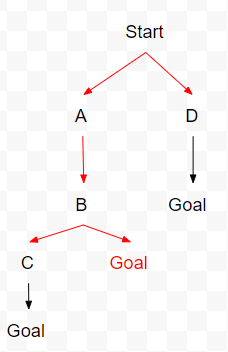

## Problem 2
Answer the following questions about the search problem shown in the figure below. Break any ties alphabetically. For the questions that ask for a path, please give your answers in a form similar to this example, 

Start − a − d − Goal

![figure](https://docs.google.com/drawings/d/e/2PACX-1vS4nUoOVGzXNZTHZLsY6wZ6VyjtPlA4mhcvWs-6mgwaeDwoMftqbYyytgBVmgOnqLoUGZbRt8cuQNfA/pub?w=640&h=480)

What path would be returned for this search problem using each of the following graph search algorithms?

a. Breadth-First Search

b. Uniform Cost Search

c. Depth-First Search

d. A* Search (using an appropriate heuristic function). Explain what heuristc function you used.



Consider the heuristics for this problem shown in the table below.

|     State     |     h1     |     h2        |
|---------------|------------|---------------|
|     start     |     5      |     4         |
|     a         |     3      |     2         |
|     b         |     6      |     6         |
|     c         |     2      |     1         |
|     d         |     3      |     3         |
|     goal      |     0      |     0         |


e. Is h1 consistent?

f. Is h2 consistent?

[YOUR ANSWERS HERE]

a. Visited: Start - a - goal
Path : Start - Goal

b. Visited: Start - a - c - d - b - goal
Path: Start - A - C - Goal

c. Visited: Start - a - b - d - goal
Path: Start - A - B - D - Goal

d. Path: Start -> a -> c -> goal. My heuristic function is increasing based on the number of nodes from start to goal with goal being 0. So, a would be 1, b and c would be 2, etc.
The final chart looks like this:

|     State     |     h     |
|---------------|------------|
|     start     |     0      |
|     a         |     1      |
|     b         |     2      |
|     c         |     2      |
|     d         |     3      |
|     goal      |     0      |


e. h1 is not consistent because the cost(start,a) + h(a) <= h(start) => 1 + 3 <= 5. 

f. h2 is not consistent because the cost(start,a) + h(a) <= h(start) => 1 + 2 <= 4.


##Problem 3

![graph](https://docs.google.com/drawings/d/e/2PACX-1vStncj9Nc0LddQeViaYnykNxEZsJoYJMHhub2LLX8s7k7gwYjlnlt0cCcivymFihiZyOOMtHwzk1Z4G/pub?w=480&amp;h=320)

Find the order of visited nodes of the given graph above using both Breadth-first Search (BFS) (Textbook Section 3.4.1) and Depth-First Search (DFS) (Textbook Section 3.4.3).

A Node class is given to you for creating the graph.

**NOTE:**
 - If two nodes are considered equally good chocices, take the node with the lower ID first. 
 - Do not revisit already explored nodes when implementing the DFS algorithm.



In [86]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    """    
    def __init__(self, ID):
        self.ID = ID
        self.connected_nodes = []
        
    def __repr__(self):
        ID = self.ID
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return '\nNode:{}\nConnected Nodes:{}'.format(ID, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: All nodes with connectivity in the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id) for _id in ids]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes

In [87]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

[
 Node:0
 Connected Nodes:1,2,3, 
 Node:1
 Connected Nodes:4,5, 
 Node:2
 Connected Nodes:5,6, 
 Node:3
 Connected Nodes:7, 
 Node:4
 Connected Nodes:None, 
 Node:5
 Connected Nodes:8, 
 Node:6
 Connected Nodes:9,10, 
 Node:7
 Connected Nodes:11, 
 Node:8
 Connected Nodes:12, 
 Node:9
 Connected Nodes:None, 
 Node:10
 Connected Nodes:12, 
 Node:11
 Connected Nodes:None, 
 Node:12
 Connected Nodes:None]

In [88]:
import math
def BFS(starting_node, goal_node):
    """
    This function implements the breath first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    # YOUR CODE HERE
    if not starting_node:
      print("No Graph")
      return visited_nodes_in_order
    if starting_node.ID == goal_node:
      visited_nodes_in_order.append(starting_node.ID) #if were already at the node were done
      return visited_nodes_in_order
    frontier = [] #connected nodes to visit
    frontier.append(starting_node);
    while len(frontier) != 0: #if we have no nodes left to visit we failed to find the goal_node
      if len(frontier) == 0:
        print("Error: no more nodes to visit")
        return None
      node = frontier.pop(0) #get the top frontier node
      visited_nodes_in_order.append(node.ID) #add it to the visited list
      if(node.ID == goal_node):
        return visited_nodes_in_order
      ordered_connected_nodes = []
      for i in node.connected_nodes: #we must sort the connected nodes by lowest ID (to break ties)
        minNodeID = math.inf  # this ensures that the lowest ID connected node will be at the top of the queue
        minNode = i
        for j in node.connected_nodes:
          if(minNodeID > j[1].ID):
            if(ordered_connected_nodes.count(j) == 0):
               minNode = j
               minNodeID = j[1].ID
        ordered_connected_nodes.append(minNode)
      for n in ordered_connected_nodes:
        if(visited_nodes_in_order.count(n[1].ID) == 0 and frontier.count(n[1]) == 0): # if its not in our visited nodes list or our frontier list
          frontier.append(n[1]) #add it to frontier
    print("Node not found")
    return visited_nodes_in_order

def DFS(starting_node, goal_node):
    """
    This function implements the depth first search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited nodes in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    visited_nodes_in_order = []
    # YOUR CODE HERE
    if not starting_node:
      print("No Graph")
      return visited_nodes_in_order
    if starting_node.ID == goal_node:
      visited_nodes_in_order.append(starting_node.ID)
      return visited_nodes_in_order
    stack = []
    stack.insert(0, starting_node)
    while(len(stack) != 0):
      if(len(stack) == 0):
        print("Error: no more nodes to visit")
        return None
      node = stack.pop(0)
      visited_nodes_in_order.append(node.ID)
      if(node.ID == goal_node):
        return visited_nodes_in_order
      ordered_connected_nodes = []
      for i in node.connected_nodes: #we must sort the connected nodes by highest ID, this ensures that the lowest ID connected node will be at the top of the stack
        minNodeID = -math.inf  #and we are meant to break ties by taking the lowest ID node
        minNode = i
        for j in node.connected_nodes:
          if(minNodeID < j[1].ID):
            if(ordered_connected_nodes.count(j) == 0):
               minNode = j
               minNodeID = j[1].ID
        ordered_connected_nodes.append(minNode)
      for n in ordered_connected_nodes:
       if(visited_nodes_in_order.count(n[1].ID) == 0 and stack.count(n[1]) == 0): # if its not in our visited nodes list or our frontier list
          stack.insert(0, n[1]) #add it to frontier
    print("Node not found")
    return visited_nodes_in_order 

In [89]:
goal_node = 12

print(BFS(build_graph()[0], goal_node))

print(DFS(build_graph()[0], goal_node))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 4, 5, 8, 12]


## Problem 4

For the same graph from **Problem 3**, implement the **A* Search** (Textbook Section 3.5.2) algorithm.

A modified Node class similar to the Node class from **Problem 3** is given to create the graph. 
Here is  the pseudo code from the book for A* Search.

#### A* Search
---
The most widely known form of best-first search is called **A∗ search** (pronounced "A-star search"). It evaluates nodes by combining $g(n)$, the cost to reach the node, and $h(n)$, the cost to get from the node to the goal:

\begin{equation*}
f(n) = g(n) + h(n) .
\end{equation*}

Since $g(n)$ gives the path cost from the start node to node $n$, and $h(n)$ is the estimated cost of the cheapest path from n to the goal, we have


$f(n)$= estimated cost of the cheapest solution through $n$ .

**NOTE:**
- If two nodes are considered equally good choices, take the node with the lower ID first. 


In [90]:
class Node:
    """
    This class describes a single node contained within a graph. 
    It has the following instannce level attributes:
    
    ID: An integer id for the node i.e. 1
    heuristic_cost: A float value representing the estimated 
                    cost to the goal node
    """    
    def __init__(self, ID, heuristic_cost):
        self.ID = ID
        self.connected_nodes = []
        self.heuristic_cost = heuristic_cost
        
    def __repr__(self):
        ID = self.ID
        hx = self.heuristic_cost
        if len(self.connected_nodes)==0:
            nodes = 'None'
        else:
            nodes = ','.join(str(cn[1].ID) for cn in self.connected_nodes)
        return 'Node:{}\nh(n):{}\nConnected Nodes:{}'.format(ID, hx, nodes)
        
    def set_connected_nodes(self,connected_nodes):
        """
        Adds edges that lead from this node to other nodes:
        
        Parameters:
        - connected_nodes: A list of tuples consisting of (cost, Node), 
                           where 'cost' is a floating point value 
                           indicating the cost to get from this node 
                           to 'Node' and 'Node' is a Node object
        """
        self.connected_nodes = connected_nodes
    
def build_graph():
    """
    Builds the graph to be parsed by the search algorithms.
    Returns: The starting node, which is the entry point into the graph
    """
    ids = range(13)
    coords = [(0,0), (1,1), (1,0), (1,1), (5,2), (3,1), (3,0), 
              (3,-1), (5,1), (4,1), (4,0), (4,-2), (7,0)]
    
    #https://en.wikipedia.org/wiki/Euclidean_distance
    euclidean_distance = lambda x1y1, x2y2: ((x1y1[0]-x2y2[0])**2 +  (x1y1[1]-x2y2[1])**2)**(0.5)
    
    def build_connected_node_list(from_id, to_ids):
        starting_coords = coords[from_id]
        
        connected_nodes = []
        for to_id in to_ids:
            connected_nodes.append((euclidean_distance(starting_coords, coords[to_id]), all_nodes[to_id]))
            
        return connected_nodes
    
    goal_coords = (7,0)
    all_nodes = [Node(_id, euclidean_distance(coord, goal_coords)) for _id, coord in zip(ids, coords)]
    
    all_nodes[8].set_connected_nodes(build_connected_node_list(8, [12]))
    all_nodes[10].set_connected_nodes(build_connected_node_list(10,[12]))
    all_nodes[5].set_connected_nodes(build_connected_node_list(5, [8]))
    all_nodes[6].set_connected_nodes(build_connected_node_list(6, [9, 10]))
    all_nodes[7].set_connected_nodes(build_connected_node_list(7, [11]))
    all_nodes[1].set_connected_nodes(build_connected_node_list(1, [4,5]))
    all_nodes[2].set_connected_nodes(build_connected_node_list(2, [5,6]))
    all_nodes[3].set_connected_nodes(build_connected_node_list(3, [7]))
    all_nodes[0].set_connected_nodes(build_connected_node_list(0, [1,2,3]))
    
    return all_nodes[0]

In [91]:
# The starting node. You can use this cell to familiarize
# yourself with the node/graph structure
build_graph()

Node:0
h(n):7.0
Connected Nodes:1,2,3

In [92]:
def a_star_search(starting_node, goal_node):
    """
    This function implements the A* search algorithm
    
    Parameters:
    - starting_node: The entry node into the graph
    - goal_node: The integer ID of the goal node.
    
    Returns:
    A list containing the visited node ids in order they were visited with starting node
    always being the first node and the goal node always being the last
    """
    
    # YOUR CODE HERE
    if not starting_node: 
      print("No Graph")
      return []
    openlist = set([starting_node]) #list of nodes still to visit
    closedlist = set([]) #list of nodes already visited
    g = {} #our g[n] function (distance from starting node)
    g[starting_node] = 0
    parents = {} #the most efficient parent of each node
    parents[starting_node] = starting_node
    while(len(openlist) > 0): #keep searching until we either run out of nodes or find it
      n = None
      for v in openlist: #go through every node not already visited
        if n == None or g[v] + v.heuristic_cost < g[n] + n.heuristic_cost: #find the shortest g[n] + h[n] of the remaining nodes 
          n = v #visit that node next
      if n == None:
        print("No Path")
        return []
      if n.ID == goal_node: #if that node is the goal node backtrack the parents to the starting node and return the results
        backtrack = []
        while parents[n] != n:
          backtrack.append(n.ID)
          n = parents[n]
        backtrack.append(starting_node.ID)
        backtrack.reverse()
        return backtrack
      for m  in n.connected_nodes: #otherwise find all of its connected nodes
        if m not in openlist or m not in closedlist: #if they havent been visited already add them to the open list
          openlist.add(m[1])
          parents[m[1]] = n #and properly set there g[n] and parents
          g[m[1]] = g[n] + m[0]
        else:
          if g[m[1]] > g[n] + m[0]: #if they have been visited already make sure this path is not better than the current path there
            g[m[1]] = g[n] + m[0] #if it is readd the node using this better path to the openlist with its new parent
            parents[m[1]] = n
            if m[1] in closedlist: 
              closedlist.remove(m[1])
              openlist.add(m[1])
      openlist.remove(n) #finally mark the new node as visited by moving it to the closedlist
      closedlist.add(n)
    print("No Path") #if we reach here there was no path
    return []
#reference: https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/

In [93]:
goal_node = 12

a_star_search_answer = [0, 2, 6, 10, 12]

assert a_star_search(build_graph(), goal_node)==a_star_search_answer

## Problem 5

**Question 3.8 of the textbook**: In section 3.1 we made an assumption that edge costs are all non-negative and therefore we would not consider problems with negative path costs.

a. Suppose that actions can have arbitrarily large negative costs; explain why this possibility would force any optimal algorithm to explore the entire state space.

b. Does it help if we insist that step costs must be greater than or equal to some negative constant c? Consider both trees and graphs.

c. Suppose that a set of actions forms a loop in the state space such that executing the set in some order results in no net change to the state. If all of these actions have negative cost, what does this imply about the optimal behavior for an agent in such an environment?

d. One can easily imagine actions with high negative cost, even in domains such as route finding. For example, some stretches of road might have such beautiful scenery as to far outweigh the normal costs in terms of time and fuel. Explain, in precise terms, within the context of state-space search, why humans do not drive around scenic loops indefinitely, and explain how to define the state space and actions for route finding so that artificial agents can also avoid looping.

e. Can you think of a real domain in which step costs are such as to cause looping?


YOUR ANSWERS HERE

a. if theres no limit on how negative an action cost could be, we could potentially find a negative action that could reduce the entire path taken to reach it to the optimal path. Therefore, it is important to search the entire state space so that we are certain that we have the largest negative cost and are certain if its worth the path traveled.

b. For trees, yes because if we know how many nodes are remaining in a path and that path collectively even with the highest negative cost for each node would have a higher cost than the current optimal path, there is no reason to continue downwards. For graphs, no because we can keep going to the same negative c cost node to create a new optimal best path causing a loop.

c. The agent will keep going through the loop because it will be able to keep bringing down the cost (as all the actions in the loop have negative cost)

d. We dont drive around scenic routes indefinitely because we eventually wish to reach our destination as that was the point of travel in the first place. Therefore, we need to ensure we have enough fuel to eventually reach our destination when taking the scenic route. In the state space, we can add a separate heuristic that represents fuel and have it increase proportionally with the number of loops until the cost would outweigh the negative of the loop and break out.

e. Purchasing a drink to use a restroom at a restaurant. Drinking the drink will make you need to use the restroom again repeating the cycle.